# Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


#read the csv file into a Pandas data frame
df = pd.read_csv('dataset_DT.csv')


#return the first 5 rows of the dataset
print(df.head())

# Pre-processing of the dataset

In [133]:
pdf=df

<AxesSubplot:>

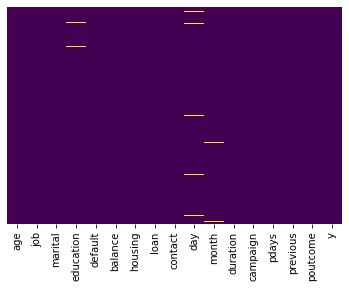

In [134]:
#to check the missing values with help of a visualization
sns.heatmap(pdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

The function with these arguments is a quick and simple way to visualize missing values in a DataFrame, where missing values (with the help of pdf.isnull()) are highlighted with a different color (with the help of cmap='viridis).

In [135]:
# for day and month
# fill a column with back fill followed by forward fill through method chaining

pdf['day'] = pdf.groupby('month')['day'].bfill().ffill()
pdf['month'] = pdf.groupby('day')['month'].bfill().ffill()

<AxesSubplot:xlabel='age', ylabel='count'>

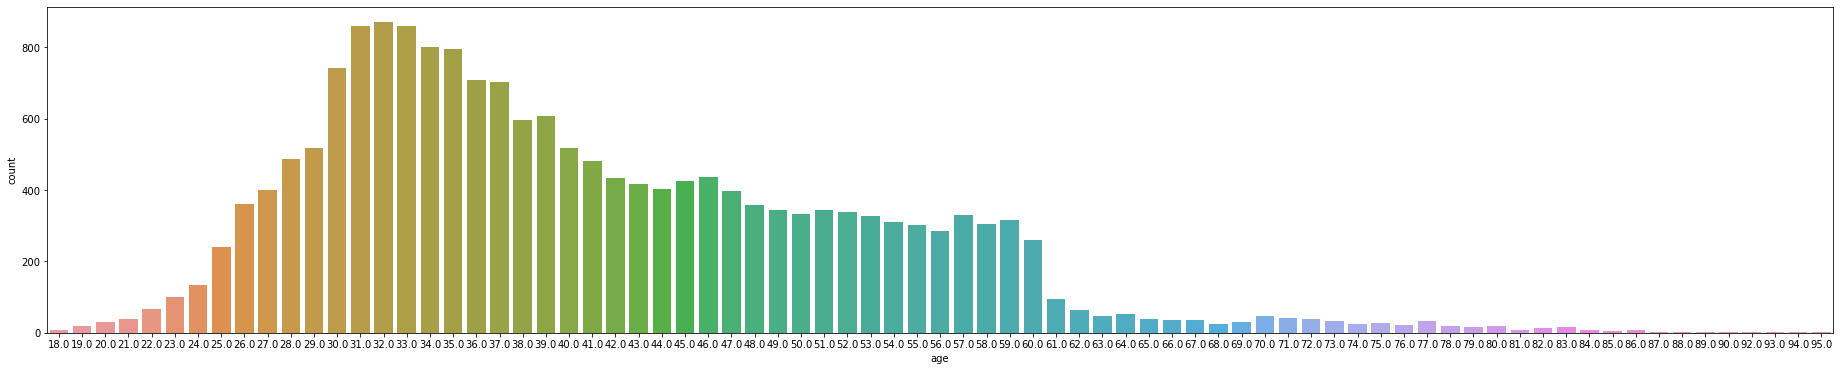

In [136]:
fig = plt.figure(figsize=(32, 6))
sns.countplot(x='age',data=pdf)

The graph is a countplot of a variable in a DataFrame using Seaborn, we can clearly see that most of the values ranges between 30 and 40. This plot is used to convert continuous feature of age to categorical. I have created a new column called age_group (with following categories 'youth', 'young adult' etc), which has same meaning of column 'age'.

In [137]:
# creating a funtion to convert continuous feature of age to categorical
def get_age_group(age):
    if age < 25:
        return 'Youth'
    elif age < 31:
        return 'Young adult'
    elif age < 41:
        return 'Early middle-aged'
    elif age < 61:
        return 'Middle-aged'
    else:
        return 'Senior'

# apply the function to the age column and create a new age group column
pdf['age_group'] = pdf['age'].apply(get_age_group)

# print the updated dataframe
print(pdf[['age_group','age']].head(50))

            age_group   age
0   Early middle-aged  34.0
1         Middle-aged  49.0
2   Early middle-aged  32.0
3         Middle-aged  46.0
4         Young adult  26.0
5         Middle-aged  54.0
6   Early middle-aged  32.0
7   Early middle-aged  37.0
8   Early middle-aged  33.0
9         Middle-aged  46.0
10        Middle-aged  44.0
11        Middle-aged  49.0
12  Early middle-aged  39.0
13  Early middle-aged  35.0
14        Middle-aged  46.0
15        Middle-aged  52.0
16  Early middle-aged  37.0
17             Senior  61.0
18        Middle-aged  41.0
19        Young adult  26.0
20  Early middle-aged  38.0
21        Middle-aged  46.0
22        Young adult  27.0
23             Senior  63.0
24              Youth  19.0
25        Young adult  26.0
26        Middle-aged  50.0
27             Senior  84.0
28             Senior  86.0
29        Middle-aged  46.0
30        Middle-aged  45.0
31        Middle-aged  60.0
32        Middle-aged  52.0
33        Middle-aged  45.0
34  Early middle-age

In [138]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the categorical data
pdf['age_group'] = le.fit_transform(pdf['age_group'])

The LabelEncoder() is a pre-processing step used to convert categorical labels into numerical labels. In machine learning, models are trained to predict target variables that are often categorical. The LabelEncoder() object is used to transform categorical data into numerical data. It maps each unique category in a categorical variable to a unique numerical value. For example, the categorical data in the "age_group" column is transformed into numerical data using the fit_transform() method of the LabelEncoder() object.

In [139]:
#dropping the age column because I have added a new column "age_group" which gives the same information
pdf.drop(['age'], axis=1,inplace=True)

In [140]:
pdf

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,age_group
0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,unknown,no,0
1,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,failure,no,1
2,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,other,no,0
3,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,unknown,no,1
4,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,unknown,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,technician,married,secondary,no,2152.0,no,no,cellular,30.0,sep,134.0,1.0,121.0,1.0,other,no,1
18419,management,married,unknown,no,0.0,no,no,cellular,30.0,sep,585.0,1.0,-1.0,0.0,unknown,no,1
18420,blue-collar,married,secondary,no,1451.0,no,no,cellular,30.0,sep,117.0,1.0,121.0,1.0,success,yes,0
18421,technician,single,secondary,no,1711.0,no,no,telephone,30.0,sep,234.0,1.0,-1.0,0.0,unknown,yes,0


# replace unkown with mode values

In [141]:
pdf['job'].value_counts()

management       4082
blue-collar      3722
technician       2949
admin.           2012
services         1582
retired          1176
self-employed     670
entrepreneur      588
unemployed        560
student           507
housemaid         463
unknown           112
Name: job, dtype: int64

In [142]:
pdf['job'] = pdf['job'].replace('unknown', pdf['job'].mode()[0])

In [143]:
pdf['education'].value_counts()

secondary    9005
tertiary     5789
primary      2556
unknown       753
Name: education, dtype: int64

In [144]:
pdf['education'] = pdf['education'].replace('unknown', pdf['education'].mode()[0])

In [145]:
mode_val=pdf['education'].mode()[0]
pdf['education'].fillna(mode_val, inplace=True)

In [146]:
pdf['contact'].value_counts()

cellular     12995
unknown       4313
telephone     1115
Name: contact, dtype: int64

In [147]:
pdf['contact'] = pdf['contact'].replace('unknown', pdf['contact'].mode()[0])

In [148]:
pdf['contact'].value_counts()

cellular     17308
telephone     1115
Name: contact, dtype: int64

In [149]:
pdf['poutcome'].value_counts()

unknown    13259
failure     2794
success     1357
other       1013
Name: poutcome, dtype: int64

Dropping poutcome because it has 72% unknown values

In [150]:
pdf.drop(['poutcome'], axis=1,inplace=True)

In [151]:
pdf

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,age_group
0,blue-collar,single,secondary,no,13408.0,no,no,cellular,1.0,apr,647.0,2.0,-1.0,0.0,no,0
1,management,divorced,tertiary,no,20727.0,no,no,cellular,1.0,apr,285.0,3.0,132.0,2.0,no,1
2,services,single,tertiary,no,1743.0,yes,no,cellular,1.0,apr,1156.0,1.0,261.0,3.0,no,0
3,management,divorced,tertiary,no,10469.0,yes,no,cellular,1.0,apr,202.0,2.0,-1.0,0.0,no,1
4,management,single,tertiary,no,7628.0,no,no,cellular,1.0,apr,263.0,1.0,-1.0,0.0,no,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,technician,married,secondary,no,2152.0,no,no,cellular,30.0,sep,134.0,1.0,121.0,1.0,no,1
18419,management,married,secondary,no,0.0,no,no,cellular,30.0,sep,585.0,1.0,-1.0,0.0,no,1
18420,blue-collar,married,secondary,no,1451.0,no,no,cellular,30.0,sep,117.0,1.0,121.0,1.0,yes,0
18421,technician,single,secondary,no,1711.0,no,no,telephone,30.0,sep,234.0,1.0,-1.0,0.0,yes,0


In [152]:

# to encode categorical variables in the "pdf" dataframe into numerical values, which is a necessary preprocessing step for a machine learning models.
pdf['job'] = le.fit_transform(pdf['job'])
pdf['marital'] = le.fit_transform(pdf['marital'])
pdf['education'] = le.fit_transform(pdf['education'])
pdf['default'] = le.fit_transform(pdf['default'])
pdf['housing'] = le.fit_transform(pdf['housing'])
pdf['default'] = le.fit_transform(pdf['default'])
pdf['loan'] = le.fit_transform(pdf['loan'])
pdf['contact'] = le.fit_transform(pdf['contact'])
pdf['y'] = le.fit_transform(pdf['y'])

In [153]:
pdf['month'] = le.fit_transform(pdf['month'])

In [154]:
pdf

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,y,age_group
0,1,2,1,0,13408.0,0,0,0,1.0,0,647.0,2.0,-1.0,0.0,0,0
1,4,0,2,0,20727.0,0,0,0,1.0,0,285.0,3.0,132.0,2.0,0,1
2,7,2,2,0,1743.0,1,0,0,1.0,0,1156.0,1.0,261.0,3.0,0,0
3,4,0,2,0,10469.0,1,0,0,1.0,0,202.0,2.0,-1.0,0.0,0,1
4,4,2,2,0,7628.0,0,0,0,1.0,0,263.0,1.0,-1.0,0.0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18418,9,1,1,0,2152.0,0,0,0,30.0,11,134.0,1.0,121.0,1.0,0,1
18419,4,1,1,0,0.0,0,0,0,30.0,11,585.0,1.0,-1.0,0.0,0,1
18420,1,1,1,0,1451.0,0,0,0,30.0,11,117.0,1.0,121.0,1.0,1,0
18421,9,2,1,0,1711.0,0,0,1,30.0,11,234.0,1.0,-1.0,0.0,1,0


# Visualizations of the features with respect to target variable 

In [155]:
#reading the csv file into a new Pandas data frame for visualization purpose
vdf = pd.read_csv('dataset_DT.csv')

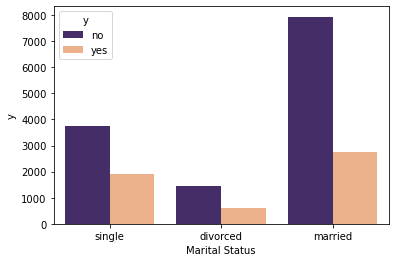

In [156]:
sns.countplot(x='marital', hue='y', data=vdf, palette=['#432371',"#FAAE7B"])

# Add labels and title
plt.xlabel('Marital Status')
plt.ylabel('y')


# Show the plot
plt.show()

- The above is the count plot plotted for marital status and 'hue=y' is to create a visual distinction between the number of observations for category in marital status.
- We can clearly see that among people who did not subscribe term deposite, majority of them are married people.
- The count of divorced people who did not subscribe term deposite is double the count of divorced people who did subscribe term deposite

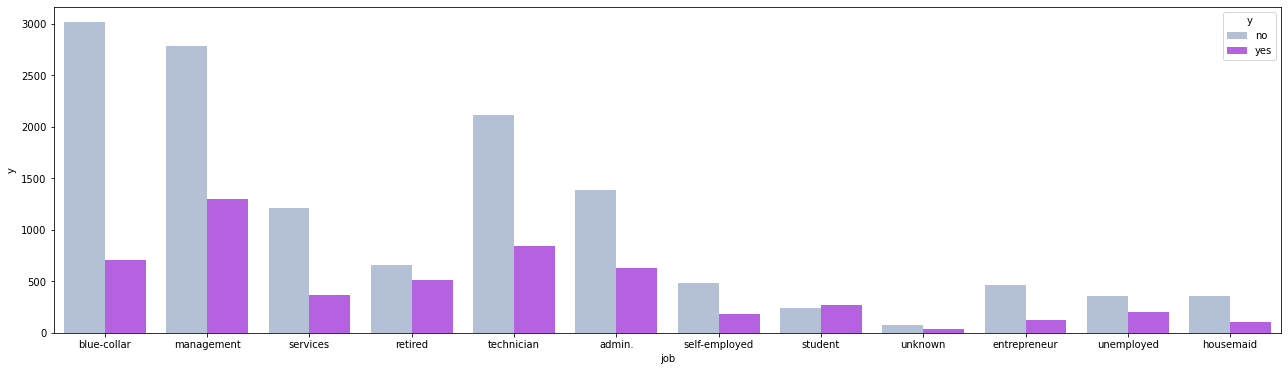

In [157]:
fig = plt.figure(figsize=(22, 6))
sns.countplot(x='job', hue='y', data=vdf, palette=["#aebedc", "#ba4df5"])

# Add labels and title
plt.xlabel('job')
plt.ylabel('y')


# Show the plot
plt.show()

- The above is the count plot plotted for marital status and 'hue=y' is to create a visual distinction between the number of observations for category in job. 
- We can clearly see that among people who did not subscribe term deposite, majority of them are people with blue-collar and management jobs.
- We can clearly see that among people who did subscribe term deposite, majority of them are people with management jobs.

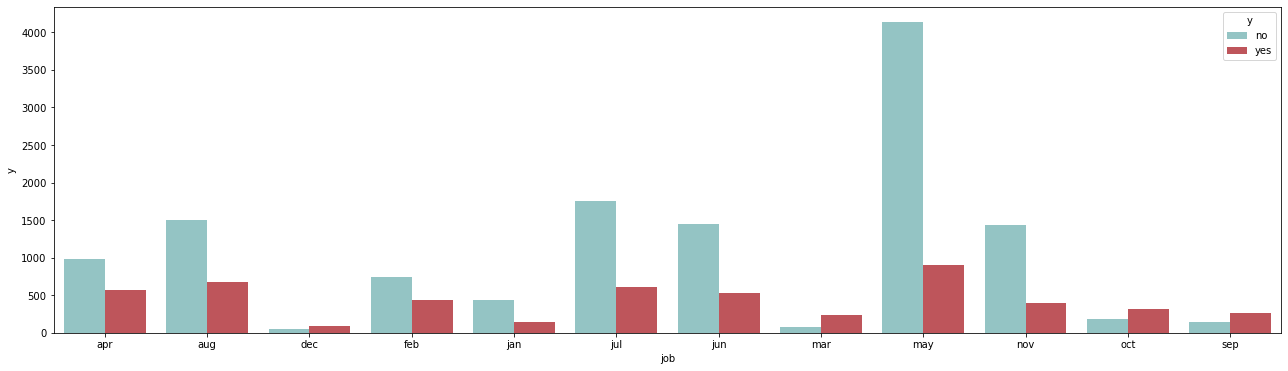

In [158]:
fig = plt.figure(figsize=(22, 6))
sns.countplot(x='month', hue='y', data=vdf, palette=["#8ccccc", "#cf444b"])

# Add labels and title
plt.xlabel('job')
plt.ylabel('y')


# Show the plot
plt.show()

- The above is the count plot plotted for marital status and 'hue=y' is to create a visual distinction between the number of observations for category in month. 
- We can clearly see that among people who did not subscribe term deposite, majority of them were last contacted in the month may.
- Also We can clearly see that among people who did subscribe term deposite, majority of them were last contacted in the month may.

# 
# Six most influential attributes on target attribute

In [159]:
correlations = pdf.corr()['y'].abs().sort_values(ascending=False)

# Select the top six attributes
top_attributes = correlations[1:7].index.tolist()
print(top_attributes)

['duration', 'housing', 'age_group', 'previous', 'education', 'loan']


The code calculates the absolute correlation values between the 'y' column and all the other columns in the 'pdf' dataframe. The correlation values are then sorted in descending order based on their absolute values. inally, the top six attributes with the highest absolute correlation values with the 'y' column are selected and their column names are printed.

# Splitted the dataset into 75% for training, and 25% for testing the classifier

In [160]:
ndf=pdf

X = ndf.drop(['y'], axis=1)
y = ndf['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Used gini and entropy (with different combinations of max_depth and min_samples_leaf parameters) to measure the quality of a split 


In [161]:
max_depths = [None, 2, 4, 6, 8]

# Define a list of min_samples_leaf values to test
min_samples_leafs = [1, 2, 3, 4, 5,]

# Iterate through each combination of max_depth and min_samples_leaf
for max_depth in max_depths:
    for min_samples_leaf in min_samples_leafs:
        
        # Create a decision tree classifier with the specified max_depth and min_samples_leaf
        dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        dt_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)

        # Train the classifiers on the training set
        dt_gini.fit(X_train, y_train)
        dt_entropy.fit(X_train, y_train)

        # Evaluate the classifiers on the testing set
        accuracy_gini = dt_gini.score(X_test, y_test)
        accuracy_entropy = dt_entropy.score(X_test, y_test)

        # Print the results
        print("Max depth: {}, Min samples leaf: {}, Gini accuracy: {:.2f}, Entropy accuracy: {:.2f}".format(max_depth, min_samples_leaf, accuracy_gini, accuracy_entropy))


Max depth: None, Min samples leaf: 1, Gini accuracy: 0.71, Entropy accuracy: 0.71
Max depth: None, Min samples leaf: 2, Gini accuracy: 0.72, Entropy accuracy: 0.71
Max depth: None, Min samples leaf: 3, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: None, Min samples leaf: 4, Gini accuracy: 0.72, Entropy accuracy: 0.73
Max depth: None, Min samples leaf: 5, Gini accuracy: 0.73, Entropy accuracy: 0.73
Max depth: 2, Min samples leaf: 1, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: 2, Min samples leaf: 2, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: 2, Min samples leaf: 3, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: 2, Min samples leaf: 4, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: 2, Min samples leaf: 5, Gini accuracy: 0.72, Entropy accuracy: 0.72
Max depth: 4, Min samples leaf: 1, Gini accuracy: 0.73, Entropy accuracy: 0.73
Max depth: 4, Min samples leaf: 2, Gini accuracy: 0.73, Entropy accuracy: 0.73
Max depth: 4, Min samples leaf: 3, Gi

criterion parameter is set to 'gini', which means that the Gini impurity will be used to measure the quality of each split in the decision tree. The max_depth and min_samples_leaf parameters are also specified to control the depth and complexity of the decision tree.

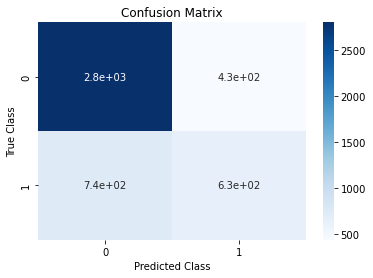

In [162]:
dt = DecisionTreeClassifier(max_depth=6)

# train the classifier on the training set
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()

In [163]:
cr = classification_report(y_test, y_pred)

# print classification report
print(cr)


              precision    recall  f1-score   support

           0       0.79      0.87      0.83      3234
           1       0.59      0.46      0.52      1372

    accuracy                           0.75      4606
   macro avg       0.69      0.66      0.67      4606
weighted avg       0.73      0.75      0.74      4606



To Visualize the confusion matrix for the classifier, which is a crucial tool for evaluating the performance of a classification model. The heatmap provides a clear visualization of the distribution of actual and predicted classes. The classification report provides a comprehensive summary of the model's performance, including metrics such as precision, recall, and F1 score, for each class.

Accuracy = 75% 

# Comparing the results of the classifier using gini and entropy 

In [164]:

y_pred_gini = dt_gini.predict(X_test)

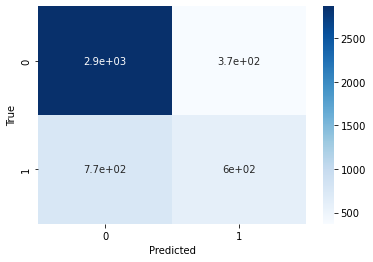

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      3234
           1       0.62      0.44      0.51      1372

    accuracy                           0.75      4606
   macro avg       0.70      0.66      0.67      4606
weighted avg       0.74      0.75      0.74      4606



In [165]:
cm = confusion_matrix(y_test, y_pred_gini)

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print the classification report for the classifier
print(classification_report(y_test, y_pred_gini))

In [166]:

y_pred_entropy = dt_entropy.predict(X_test)

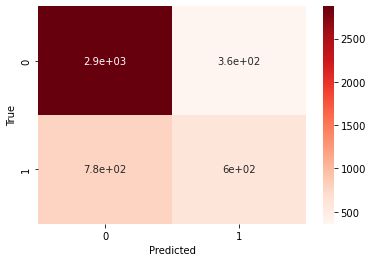

              precision    recall  f1-score   support

           0       0.79      0.89      0.83      3234
           1       0.62      0.44      0.51      1372

    accuracy                           0.75      4606
   macro avg       0.71      0.66      0.67      4606
weighted avg       0.74      0.75      0.74      4606



In [167]:
# calculate the confusion matrix for the classifier
cm2 = confusion_matrix(y_test, y_pred_entropy)

# plot the confusion matrix as a heatmap
sns.heatmap(cm2, annot=True, cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# print the classification report for the classifier
print(classification_report(y_test, y_pred_entropy))

To compare the performance of the decision tree classifiers using Gini impurity and entropy, we can look at the classification report for each criterion and compare the following metrics:

Precision: This metric measures the proportion of true positives among the predicted positives. A high precision indicates that the classifier has a low rate of false positives.

Recall: This metric measures the proportion of true positives among the actual positives. A high recall indicates that the classifier has a low rate of false negatives.

F1-score: This metric is the harmonic mean of precision and recall, and provides a balance between the two metrics. A high F1-score indicates that the classifier has a good balance of precision and recall.

Support: This metric represents the number of instances in each class in the test set.

By comparing these metrics for each classifier, we can determine which criterion is better for our specific problem. For example, if the precision is more important than recall, we may choose the classifier with higher precision. On the other hand, if recall is more important than precision, we may choose the classifier with higher recall.


Note:

We can clearly see that both has worked similarly and both have same accuracy aswell.

# Printing the decision tree visualization with depth of 5

In [168]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
feature_name

['job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'age_group']

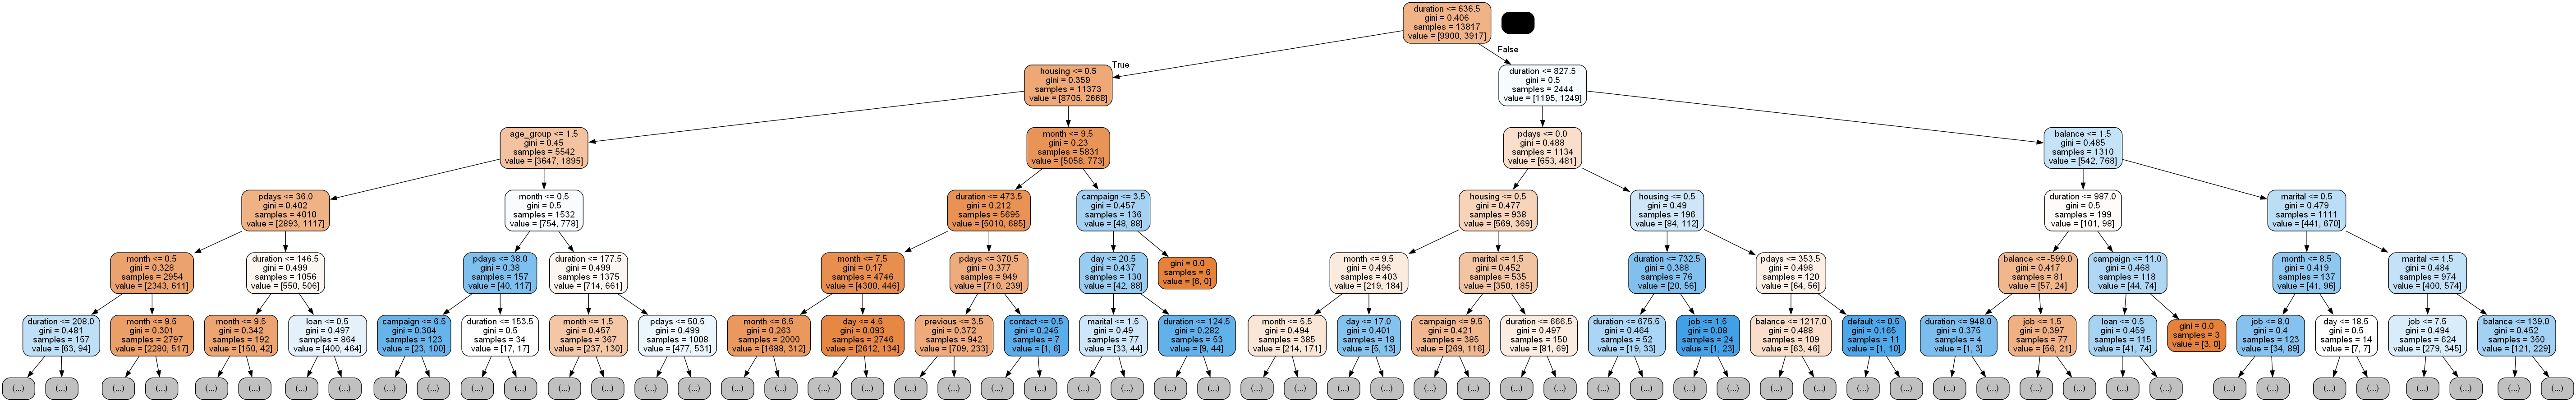

In [169]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus


# create a dot_file which stores the tree structure
dot_data = export_graphviz(dt,feature_names = feature_name,rounded = True,filled = True, max_depth=5)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.set_size(40, 40)
graph.write_png("myTree.png")
graph.set_size(42, 90)
# Show graph
Image(graph.create_png(),width=1600, height=3600)

It creates a dot file that stores the tree structure, draws the graph using Pydotplus, and displays the final output as an image using IPython. The max depth of the tree is limited to 5 and the graph's size is customized for better visibility.